## Table of contents : 
 This quick notebook about populatin growth is divided in 3 parts :
1. Data prepartion + Web scrapping
2. Global population growth analysis
3. Prediction of the world population for the next years 📉

there are 3 files: 
- population_pred 
- Income_group.csv 
- Population_size_1961 | this file is webScarped through a website, you don't have to download it 

### 1) Importing libraries, Data cleansing, Data wrangling, Merging multiple datasets

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# this is our first dataset 
PercGrow = pd.read_csv("Population_pred.csv")

In [3]:
# this is my income group dataset , this will help us merge datasets with web scarping, i will use the regions column to connect with the a new dataset 
IncomeGroup = pd.read_csv('Income_group.csv')

In [4]:
PercGrow.sample(6)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
81,Ghana,GHA,Population growth (annual %),SP.POP.GROW,NaN,3.160638,3.213951,3.175101,3.027040,2.817296,...,2.424370,2.369475,2.323852,2.291781,2.268815,2.246599,2.220532,2.192829,2.162578,NaN
232,Tajikistan,TJK,Population growth (annual %),SP.POP.GROW,NaN,3.395611,3.523802,3.586650,3.568856,3.496924,...,2.234800,2.277533,2.321266,2.367164,2.408648,2.448490,2.470382,2.453465,2.390546,NaN
230,Togo,TGO,Population growth (annual %),SP.POP.GROW,NaN,1.070670,0.948771,1.171774,1.840398,2.762626,...,2.677515,2.660850,2.635745,2.601150,2.560945,2.518742,2.479318,2.445904,2.420335,NaN
62,Europe & Central Asia (excluding high income),ECA,Population growth (annual %),SP.POP.GROW,NaN,1.614092,1.607710,1.589204,1.560056,1.515153,...,0.616488,0.616754,0.674234,0.667906,0.679683,0.659708,0.615782,0.542740,0.495548,NaN
217,Sao Tome and Principe,STP,Population growth (annual %),SP.POP.GROW,NaN,0.465464,-0.190578,-0.385363,0.071591,0.952248,...,2.276370,2.080906,1.935980,1.877244,1.875249,1.885025,1.882507,1.884217,1.890763,NaN
17,Burkina Faso,BFA,Population growth (annual %),SP.POP.GROW,NaN,1.342943,1.334299,1.351523,1.403618,1.479135,...,3.008982,2.997392,2.981606,2.961901,2.939463,2.915319,2.890851,2.867078,2.844223,NaN


In [5]:
PercGrow.shape

(264, 65)

In [6]:
# dropping Indicator Name, Indicator Code, 1960, 2020
# we drop all these columns from our dataset, becasue they are not relevant 

PercGrow = PercGrow.drop(PercGrow.columns[2:4], axis=1)
PercGrow = PercGrow.drop(["1960","2020"], axis=1)
PercGrow.head()

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [7]:
# checking for nulls 
PercGrow[PercGrow.columns[5:-1]].isnull().sum()

1964    4
1965    4
1966    4
1967    4
1968    4
1969    4
1970    4
1971    4
1972    4
1973    4
1974    4
1975    4
1976    4
1977    4
1978    4
1979    4
1980    4
1981    4
1982    4
1983    4
1984    4
1985    4
1986    4
1987    4
1988    4
1989    4
1990    3
1991    3
1992    3
1993    3
1994    3
1995    3
1996    2
1997    2
1998    2
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
dtype: int64

In [8]:
# There are still NaN values, but by removing the countries with missing values from the year 1961, we end up with a cleaner dataset
PercGrow = PercGrow.drop(PercGrow[PercGrow["1961"].isnull() == True].index, axis=0)
PercGrow[PercGrow.columns[5:-1]].isnull().sum()
PercGrow = PercGrow.fillna(0)

In [9]:
""" The % growth tells us how much a population has increased in comparison to the previous year.
However, our dataset does not provide any information on the size of a population.
In order to flesh out our data, I went to look up the population of many countries in 1961 on the site 

https://www.bluemarblecitizen.com/world-population/1961
"""

import re
import requests
from bs4 import BeautifulSoup

url = "https://www.bluemarblecitizen.com/world-population/1961"

try:
    page=requests.get(url)
except:
    print("Problem with the request")

soup=BeautifulSoup(page.content,"html.parser")
results = soup.find_all(class_="popTable")

def cleanhtml(raw_html):
    return re.sub(re.compile('<.*?>'), '/', raw_html).split("//")[1:-1]

dataset = []

for table in results:
    job_section = table.find_all("tr")
    for job in job_section:
        scapped = [item.replace("/","") for item in cleanhtml(str(job))[1:3]] 
        if scapped not in dataset:
            dataset.append(scapped)

d = {str(PercGrow.columns[0]): [item[0] for item in dataset[1:]], 'Population_1961': [int(item[1].replace(",","")) for item in dataset[1:]]}
Population_size_1961 = pd.DataFrame(data=d)
Population_size_1961.head()

,Country Name,Population_1961
0,China,645409760
1,India,454425502
2,United States,182992000
3,Russia,121324346
4,Indonesia,102381963


In [10]:
#Left Join on Country Name
#this join classifys parts of the world in many types such as europe, asia, underdeveloped region, high income countires, low income countries  

TestNaN = pd.merge(PercGrow,Population_size_1961,on=str(PercGrow.columns[0]),how='left')
TestNaN[TestNaN.Population_1961.isnull() == True]["Country Name"].unique()

array(['Arab World', 'Bahamas, The', 'Brunei Darussalam',
       'Central Europe and the Baltics', 'Channel Islands',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Caribbean small states',
       'Czech Republic', 'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Egypt, Arab Rep.', 'Euro area',
       'European Union', 'Fragile and conflict affected situations',
       'Micronesia, Fed. Sts.', 'Gambia, The', 'High income',
       'Hong Kong SAR, China', 'Heavily indebted poor countries (HIPC)',
       'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend',
       'IDA only', 'Iran, Islamic Rep.', 'Kyrgyz Republic',
       'St. Kitts and Nevis', 'Korea, Rep.',
       'Latin America & Caribbean (excluding high income)', 'Lao PDR',
       'St. Lucia', 'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income

In [19]:
# So if we only use the countries that have data for their population size, we already lose 75 of them.
# We can also see that we have a line : "World"!
# Quite interesting, so we will remove it from the data set.

World = PercGrow[PercGrow["Country Name"] == "World"].copy()
World["Population_1961"] = 3091843507
World

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Population_1961
257,World,WLD,1.35392,1.724198,2.083131,2.052951,2.054892,2.108305,2.046206,2.032273,...,1.17004,1.183831,1.183727,1.179816,1.16812,1.162578,1.14204,1.103609,1.074675,3091843507


In [20]:
# In order to know the evolution of the population of each selected countries, we multiply the population of the previous year with the growth percentage of the current year to calculate the population growth.
 
PopulationSize = pd.merge(PercGrow,Population_size_1961,on=str(PercGrow.columns[0]),how='inner')

for col in PopulationSize.columns[3:-1]:
    PopulationSize[f"Population_{col}"] = round(PopulationSize[f"Population_{int(col)-1}"] + PopulationSize[f"Population_{int(col)-1}"] * (PopulationSize[col]/100))

PopulationSize.head(5)

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019
0,Aruba,ABW,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,...,103502.0,103885.0,104407.0,105015.0,105639.0,106215.0,106754.0,107256.0,107742.0,108218.0
1,Afghanistan,AFG,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,2.188108,2.254572,...,31060834.0,32037115.0,33128808.0,34286524.0,35437036.0,36527463.0,37542312.0,38499020.0,39417130.0,40328382.0
2,Angola,AGO,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,-0.120653,-0.044882,...,19816151.0,20536301.0,21275151.0,22030834.0,22801361.0,23585466.0,24382247.0,25192245.0,26017577.0,26861322.0
3,Albania,ALB,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,...,2917711.0,2909862.0,2905056.0,2899734.0,2893730.0,2885303.0,2880690.0,2878041.0,2870940.0,2858710.0
4,Andorra,AND,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,...,50676.0,50253.0,49455.0,48453.0,47507.0,46781.0,46351.0,46173.0,46176.0,46257.0


In [21]:
# Finally, I just add the regions to our dataset and we are ready to start the analysis.
# by adding this new dataset

df = pd.merge(IncomeGroup[IncomeGroup.columns[0:3]],PopulationSize,on="Country Code",how='inner')
df.head(5)

,Country Code,Region,IncomeGroup,Country Name,1961,1962,1963,1964,1965,1966,...,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019
0,ABW,Latin America & Caribbean,High income,Aruba,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,...,103502.0,103885.0,104407.0,105015.0,105639.0,106215.0,106754.0,107256.0,107742.0,108218.0
1,AFG,South Asia,Low income,Afghanistan,1.898476,1.965751,2.029893,2.090248,2.147567,2.171009,...,31060834.0,32037115.0,33128808.0,34286524.0,35437036.0,36527463.0,37542312.0,38499020.0,39417130.0,40328382.0
2,AGO,Sub-Saharan Africa,Lower middle income,Angola,1.393363,1.383629,1.256555,0.973962,0.617544,0.184283,...,19816151.0,20536301.0,21275151.0,22030834.0,22801361.0,23585466.0,24382247.0,25192245.0,26017577.0,26861322.0
3,ALB,Europe & Central Asia,Upper middle income,Albania,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,...,2917711.0,2909862.0,2905056.0,2899734.0,2893730.0,2885303.0,2880690.0,2878041.0,2870940.0,2858710.0
4,AND,Europe & Central Asia,High income,Andorra,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,...,50676.0,50253.0,49455.0,48453.0,47507.0,46781.0,46351.0,46173.0,46176.0,46257.0


## Analyzing Growth Evolution arround the World
Now that our dataset is ready, we can start by observing the evolution of the last 60 years at the level of the regions of the ## world but also in its totality.
We will compare both the Population in quantity and the evolution in percentage.

In [22]:
# i'm combing 60 years of growth rate and 60 years of population size .
import matplotlib.pyplot as plt
import seaborn as sns
colunms = World.columns[3:-1].copy()

for col in colunms:
    World[f"Population_{col}"] = round(World[f"Population_{int(col)-1}"] + World[f"Population_{int(col)-1}"] * (World[col]/100))

    World[World.columns[2:61]].values[0]

C:\Users\abdul\AppData\Local\Temp\ipykernel_11004\1807148093.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


[Text(1961, 0, '1961'),
 Text(1963, 0, '1963'),
 Text(1965, 0, '1965'),
 Text(1967, 0, '1967'),
 Text(1969, 0, '1969'),
 Text(1971, 0, '1971'),
 Text(1973, 0, '1973'),
 Text(1975, 0, '1975'),
 Text(1977, 0, '1977'),
 Text(1979, 0, '1979'),
 Text(1981, 0, '1981'),
 Text(1983, 0, '1983'),
 Text(1985, 0, '1985'),
 Text(1987, 0, '1987'),
 Text(1989, 0, '1989'),
 Text(1991, 0, '1991'),
 Text(1993, 0, '1993'),
 Text(1995, 0, '1995'),
 Text(1997, 0, '1997'),
 Text(1999, 0, '1999'),
 Text(2001, 0, '2001'),
 Text(2003, 0, '2003'),
 Text(2005, 0, '2005'),
 Text(2007, 0, '2007'),
 Text(2009, 0, '2009'),
 Text(2011, 0, '2011'),
 Text(2013, 0, '2013'),
 Text(2015, 0, '2015'),
 Text(2017, 0, '2017'),
 Text(2019, 0, '2019')]

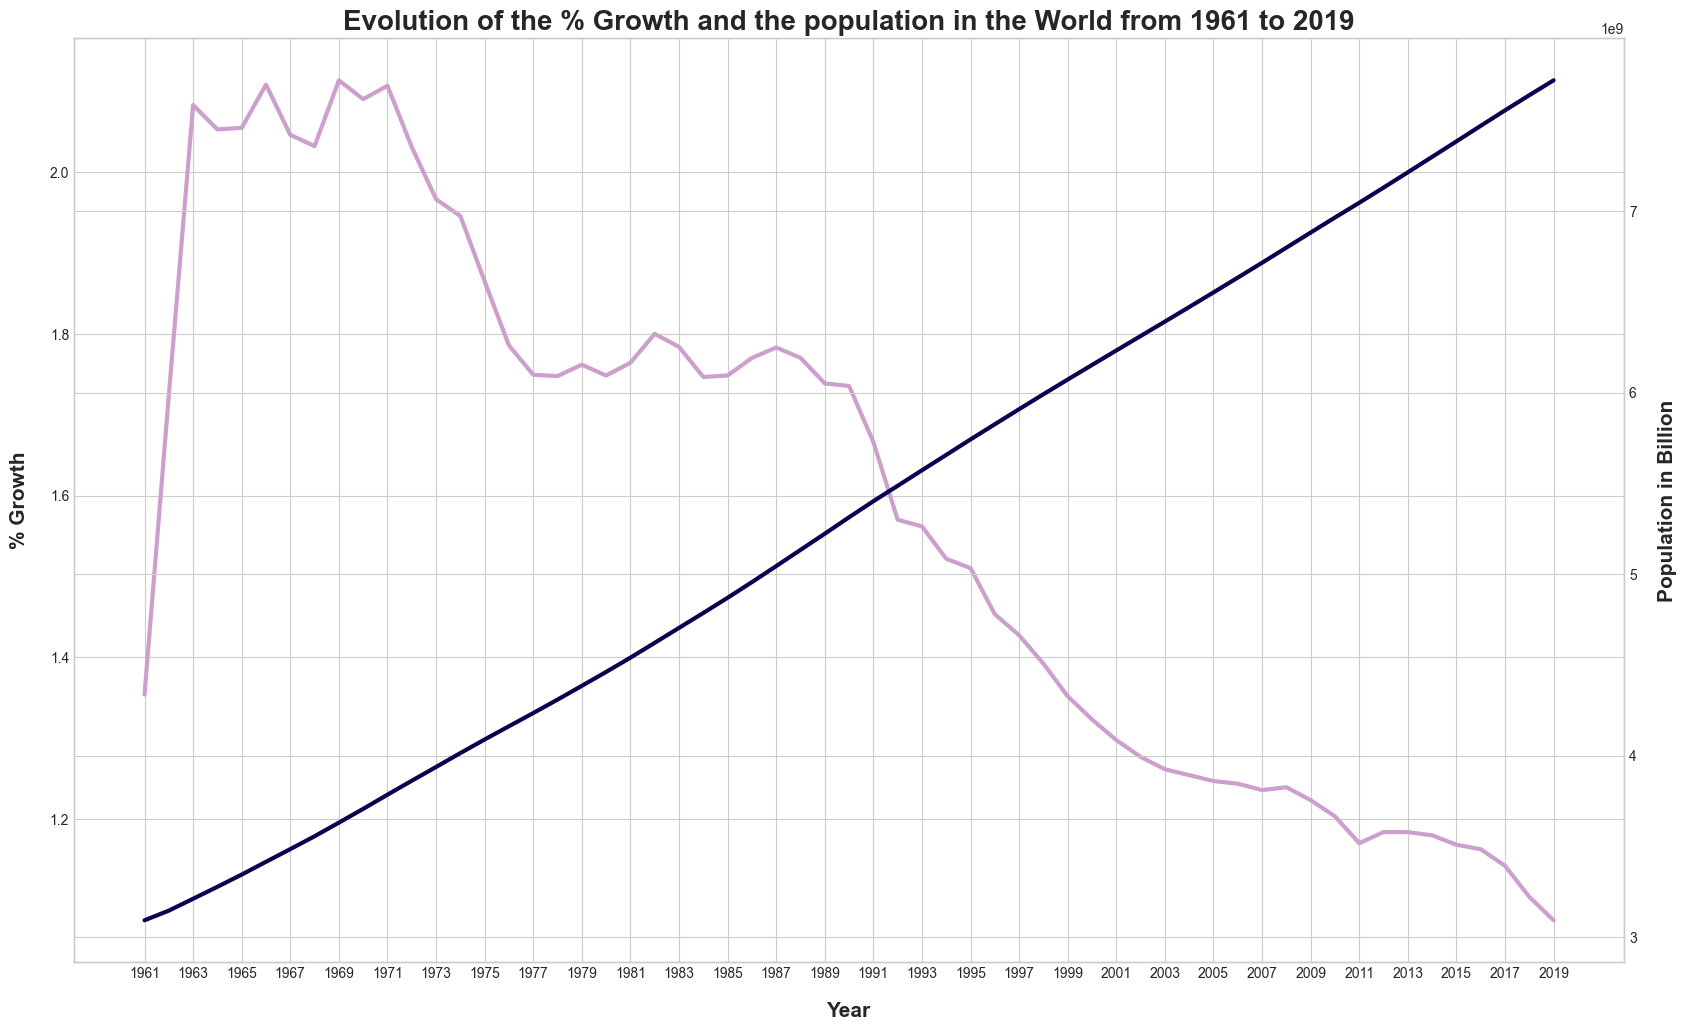

In [23]:
#Set a figure 
plt.style.use('seaborn-whitegrid')
fig, ax_G = plt.subplots(figsize=[20,12])
ax_P = ax_G.twinx()

ax_G.set_xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_ylabel("% Growth",fontsize=15,fontweight=550,labelpad=15)
ax_P.set_ylabel("Population in Billion",fontsize=15,fontweight=550,labelpad=15)
ax_G.set_title("Evolution of the % Growth and the population in the World from 1961 to 2019",fontsize=20,fontweight=600)

ax_P.plot([int(item[-4:]) for item in World.columns[61:].tolist()],World[World.columns[61:]].values[0],linewidth=3,label="Population",color = "#0A014F");
ax_G.plot([int(item) for item in World.columns[2:61].tolist()],World[World.columns[2:61]].values[0],linewidth=3,label="% Growth",color = "#CD9FCC")

ax_G.set_xticks([1961 + i*2 for i in range(0,30)])
ax_G.set_xticklabels([1961 + i*2 for i in range(0,30)])


In [24]:
# I start by grouping the countries into regions using the "groupby" function and calculating their average
Evolution_by_region = df.groupby(["Region"]).mean()
Percentage_years_columns = Evolution_by_region.columns[0:59] #% growth columns 
Population_years_columns = Evolution_by_region.columns[59:] #population size columns 

C:\Users\abdul\AppData\Local\Temp\ipykernel_11004\655174360.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Evolution_by_region = df.groupby(["Region"]).mean()


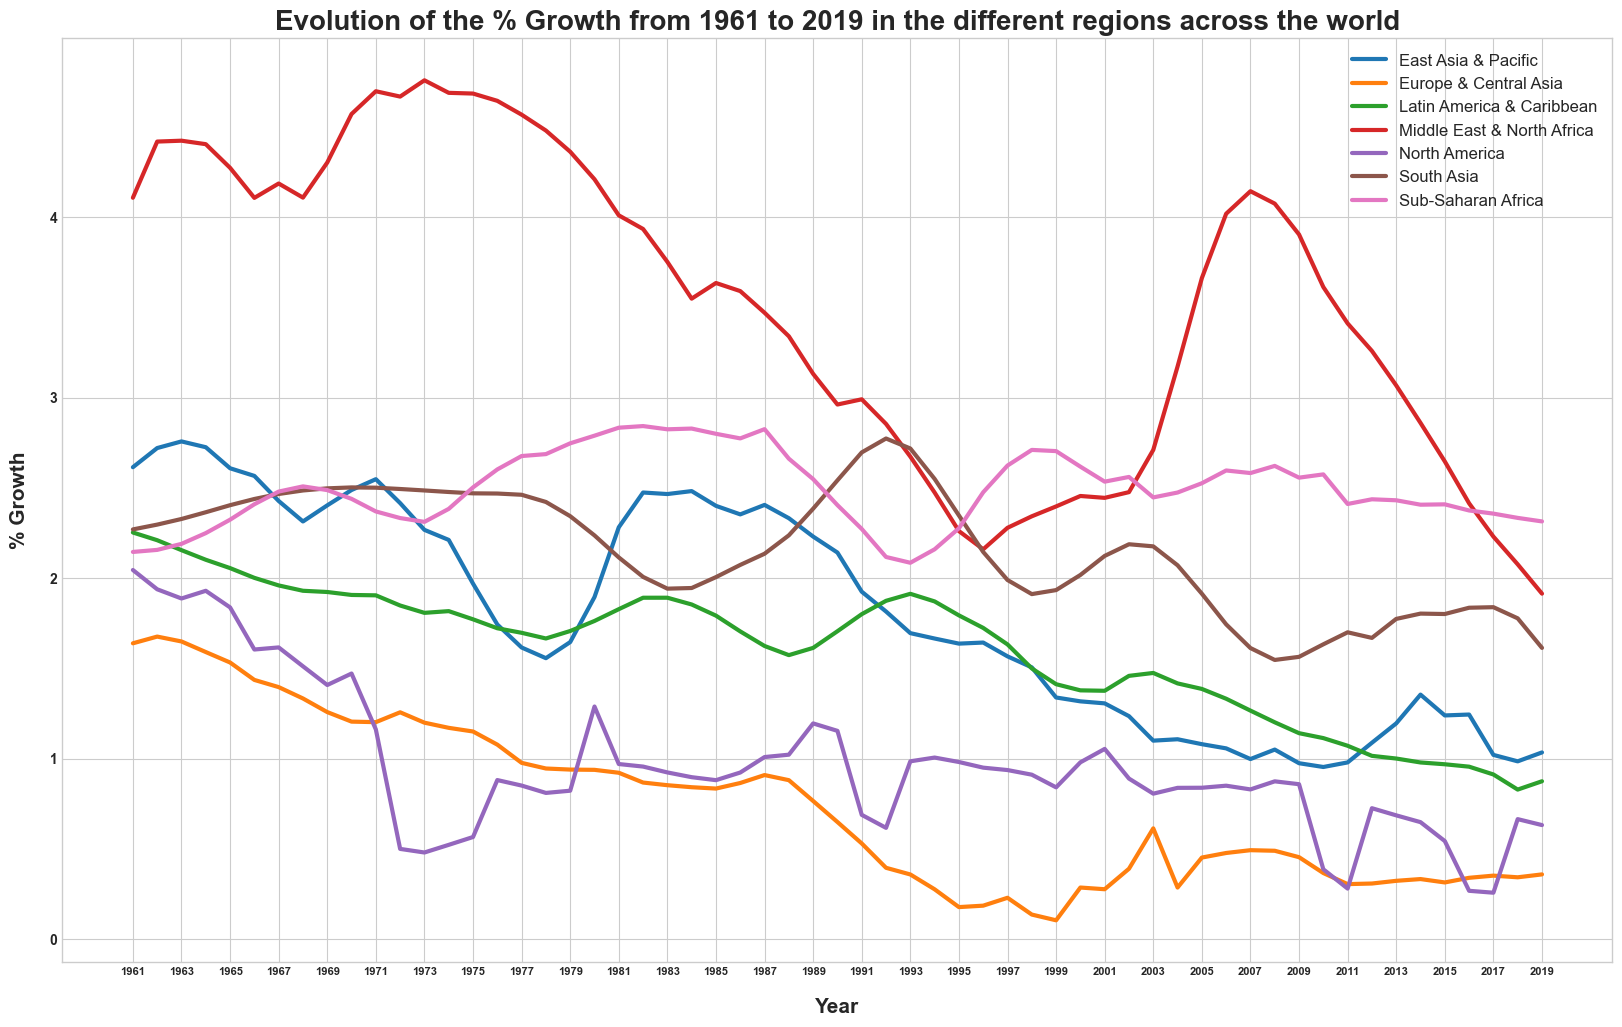

In [25]:
# let see the population growth by differnt regions 
fig = plt.figure(figsize=[20,12])
plt.yticks(fontsize=10,fontweight=550) 
plt.xticks([i*2 for i in range(0,30)],fontsize=8,fontweight=550)
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("% Growth",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution of the % Growth from 1961 to 2019 in the different regions across the world",fontsize=20,fontweight=600)

for index in Evolution_by_region.index:
    plt.plot(Evolution_by_region[Percentage_years_columns].loc[index],label = index,linewidth=3);

plt.legend(fontsize=12)

## Forecasting world % growth for next years
Now that we are well advanced on the subject, we can now try to predict what might happen in 20, 30 or even 50 years.
We are going to use different forecasting methods on the global population, taking into account % growth and the world population.

Before that, we will convert the data into TimeSeries!

In [26]:
PercentGrowth = pd.melt(World[World.columns[2:61]]).rename(columns={"variable" : "Year","value" : "PercGrowth"})
PercentGrowth["Year"] = PercentGrowth["Year"].map(lambda x : pd.to_datetime(f"{x}-12-31"))
PercentGrowth.head(5)

,Year,PercGrowth
0,1961-12-31,1.353920
1,1962-12-31,1.724198
2,1963-12-31,2.083131
3,1964-12-31,2.052951
4,1965-12-31,2.054892


## Autoregression (AR)
Autoregressive modeling is training a regression model on the value of response variable itself.
Autoregressive is made of the word, Auto and Regressive which represents the linear regression on itself (auto).

<AxesSubplot: title={'center': '% Growth of the world population'}, xlabel='Year', ylabel='% Growth'>

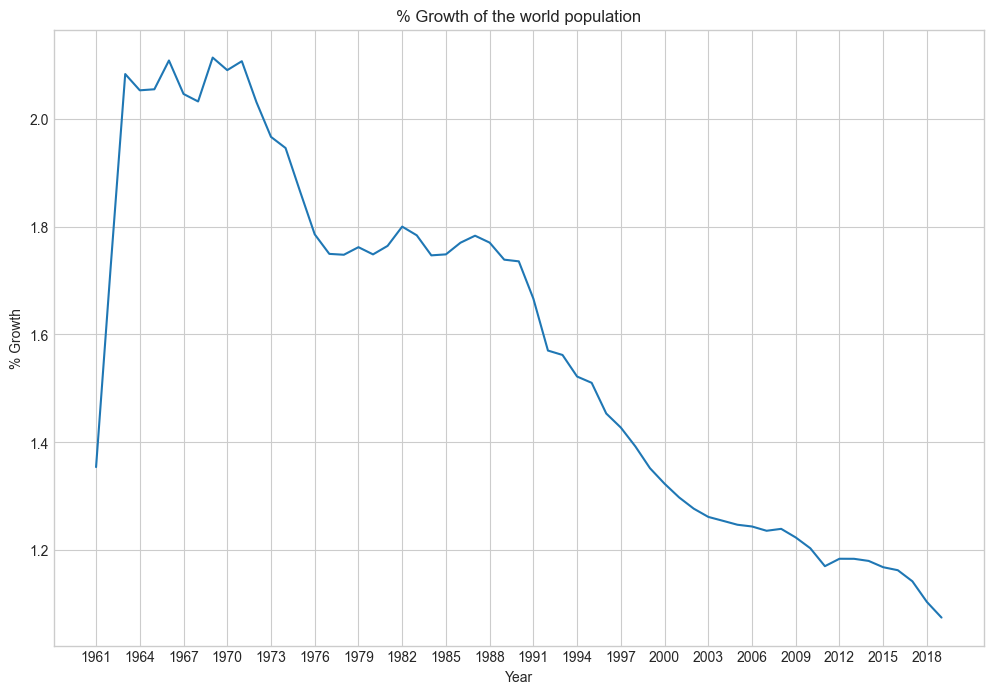

In [27]:
plt.figure(figsize=[12,8])
plt.title("% Growth of the world population")
plt.xlabel("Year")
plt.ylabel("% Growth")
plt.xticks([i*3 for i in range(0,20)],labels = [1961 + i*3 for i in range(20)])
PercentGrowth['PercGrowth'].plot()

P-value:  0.9437518182894581 , then no stationarity.


C:\Users\abdul\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x800 with 0 Axes>

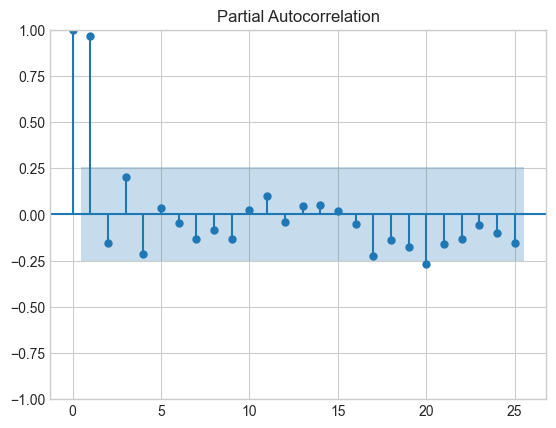

In [28]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg

# Run the test
PG_stationarityTest = adfuller(PercentGrowth['PercGrowth'], autolag='AIC')

# Check the value of p-value
print("P-value: ", PG_stationarityTest[1],", then no stationarity.")

plt.figure(figsize=[12,8])
pacf = plot_pacf(PercentGrowth['PercGrowth'], lags=25)

# Create training and test data
train_data = PercentGrowth['PercGrowth'][:round(len(PercentGrowth['PercGrowth'])*0.8)]
test_data = PercentGrowth['PercGrowth'][round(len(PercentGrowth['PercGrowth'])*0.8):]

In [29]:
# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=6).fit()
print(ar_model.summary())
plt.show()

                            AutoReg Model Results                             
Dep. Variable:             PercGrowth   No. Observations:                   47
Model:                     AutoReg(6)   Log Likelihood                  83.798
Method:               Conditional MLE   S.D. of innovations              0.031
Date:                Wed, 22 Mar 2023   AIC                           -151.596
Time:                        18:52:59   BIC                           -137.887
Sample:                             6   HQIC                          -146.604
                                   47                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0029      0.037      0.079      0.937      -0.070       0.076
PercGrowth.L1     1.2875      0.155      8.303      0.000       0.984       1.591
PercGrowth.L2    -0.3271      0.246     

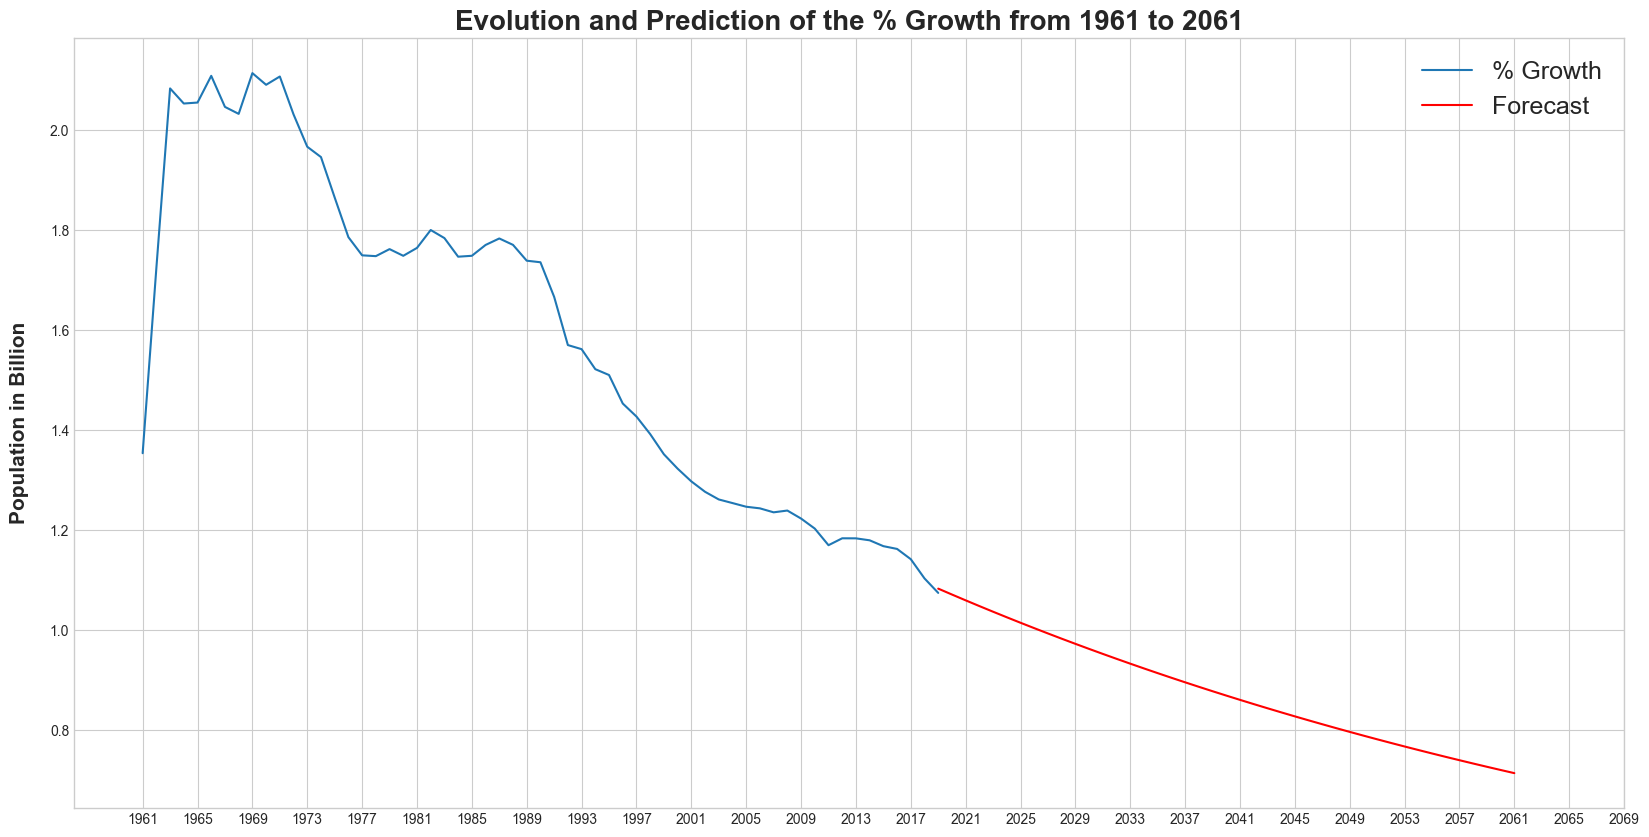

In [31]:
# Make the predictions
plt.figure(figsize=[20,10])
plt.plot(PercentGrowth['PercGrowth'],label="% Growth")
pred = ar_model.predict(start=len(PercentGrowth)-1, end=(len(PercentGrowth)+41), dynamic=False)
plt.plot(pred,color='red',label="Forecast")
plt.xticks([i*4 for i in range(28)],labels = [1961 + i*4 for i in range(28)])
plt.ylabel("Population in Billion",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the % Growth from 1961 to 2061",fontsize=20,fontweight=600)

plt.legend(fontsize=18)

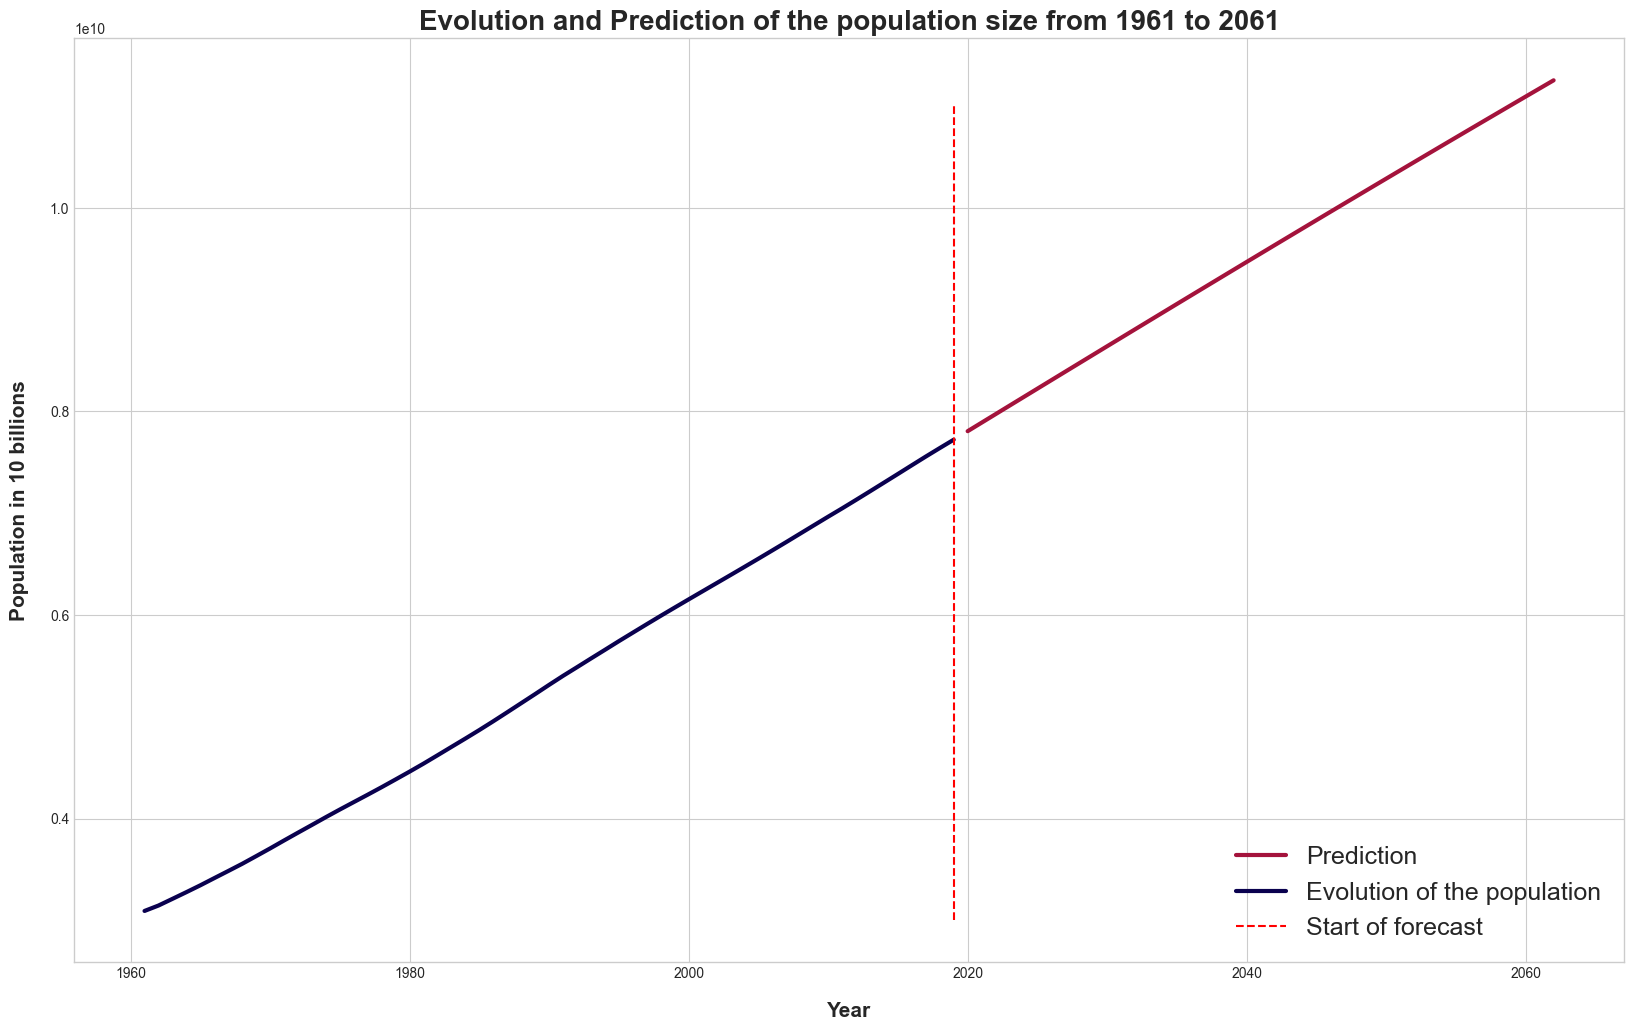

In [32]:
PopIni = World["Population_2019"].values[0]
Pred_pop_size = []

for percGrowth in pred:
    PopIni = PopIni + PopIni * (percGrowth/100)
    Pred_pop_size.append(PopIni)
    
#Set a figure 
fig = plt.figure(figsize=[20,12])
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Population in 10 billions",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the population size from 1961 to 2061",fontsize=20,fontweight=600)
#ax_P.set_xticks([i*2 for i in range(0,30)])
#ax_P.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

plt.plot([2020 + i for i in range(43)],Pred_pop_size,linewidth=3,label="Prediction",color = "#a4133c")
plt.plot([int(item[-4:]) for item in World.columns[61:].tolist()],World[World.columns[61:]].values[0],linewidth=3,label="Evolution of the population",color = "#0A014F")
plt.vlines(2019, 3000000000, 11000000000, linestyle='--', color='r', label='Start of forecast');
plt.legend(fontsize=18,loc=4)

# Let's predict population and growth rate for singapore which has relatively small population of 5.1 million apprx...

- i will prefix s for singapore as variable name, columns | "PercentGrowth" = 'sPercentGrowth

In [34]:
singapore = PercGrow[PercGrow["Country Name"]=="Singapore"].copy()

# population of singapore in 1961 was 1650000, so let's assing that 
singapore["Population_1961"] = 1650000

In [35]:
scolunms = singapore.columns[3:-1].copy()
# same thing i  did with world population, first 60 rows for growth rate and other 60 for population size 
for cols in scolunms:
    singapore[f"Population_{cols}"] = round(singapore[f"Population_{int(cols)-1}"] + singapore[f"Population_{int(cols)-1}"] * (singapore[cols]/100))

    singapore[singapore.columns[2:61]].values[0]

In [36]:
singapore 

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,Population_2019
206,Singapore,SGP,3.344793,2.769105,2.527495,2.562974,2.430051,2.486193,2.208679,1.724526,...,4844114.0,4945109.0,5066432.0,5148473.0,5215323.0,5277196.0,5345664.0,5350400.0,5375531.0,5437042.0


In [37]:
sPercentGrowth = pd.melt(singapore[singapore.columns[2:61]]).rename(columns={"variable" : "Year","value" : "PercGrowth"})
sPercentGrowth["Year"] = sPercentGrowth["Year"].map(lambda x : pd.to_datetime(f"{x}-12-31"))
sPercentGrowth.head(5)

,Year,PercGrowth
0,1961-12-31,3.344793
1,1962-12-31,2.769105
2,1963-12-31,2.527495
3,1964-12-31,2.562974
4,1965-12-31,2.430051


In [38]:
strain_data = sPercentGrowth['PercGrowth'][:round(len(sPercentGrowth['PercGrowth'])*0.8)]
stest_data = sPercentGrowth['PercGrowth'][round(len(sPercentGrowth['PercGrowth'])*0.8):]

In [39]:
# Run the test
sPG_stationarityTest = adfuller(sPercentGrowth['PercGrowth'], autolag='AIC')

# Check the value of p-value
print("P-value: ", sPG_stationarityTest[1],", then no stationarity.")

plt.figure(figsize=[12,8])
spacf = splot_pacf(sPercentGrowth['PercGrowth'], lags=25)

sr = AutoReg(strain_data, lags=6).fit()
print(sr.summary())
plt.show()

                            AutoReg Model Results                             
Dep. Variable:             PercGrowth   No. Observations:                   47
Model:                     AutoReg(6)   Log Likelihood                 -58.388
Method:               Conditional MLE   S.D. of innovations              1.005
Date:                Wed, 22 Mar 2023   AIC                            132.775
Time:                        18:58:39   BIC                            146.484
Sample:                             6   HQIC                           137.767
                                   47                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6373      0.598      2.736      0.006       0.465       2.810
PercGrowth.L1     0.6224      0.156      3.992      0.000       0.317       0.928
PercGrowth.L2    -0.2495      0.182     

In [40]:
spred = sr.predict(start=len(strain_data), end=(len(sPercentGrowth)-1), dynamic=False)

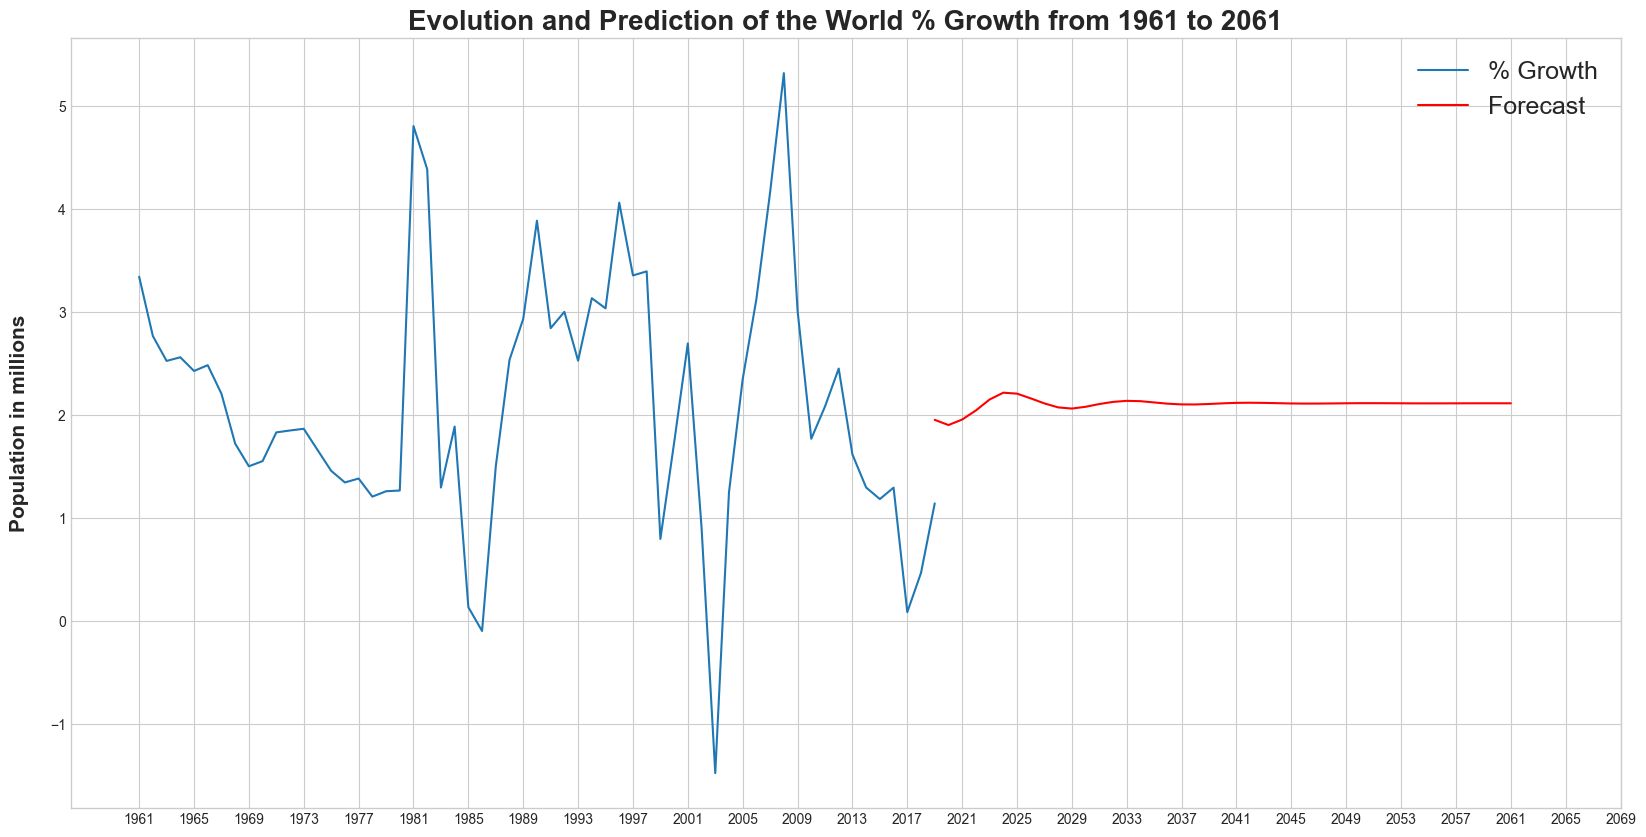

In [52]:
# Make the predictions
plt.figure(figsize=[20,10])
plt.plot(sPercentGrowth['PercGrowth'],label="% Growth")
spred = sr.predict(start=len(sPercentGrowth)-1, end=(len(sPercentGrowth)+41), dynamic=False)
plt.plot(spred,color='red',label="Forecast")
plt.xticks([i*4 for i in range(28)],labels = [1961 + i*4 for i in range(28)])
plt.ylabel("Population in millions",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the World % Growth from 1961 to 2061",fontsize=20,fontweight=600)

plt.legend(fontsize=18)

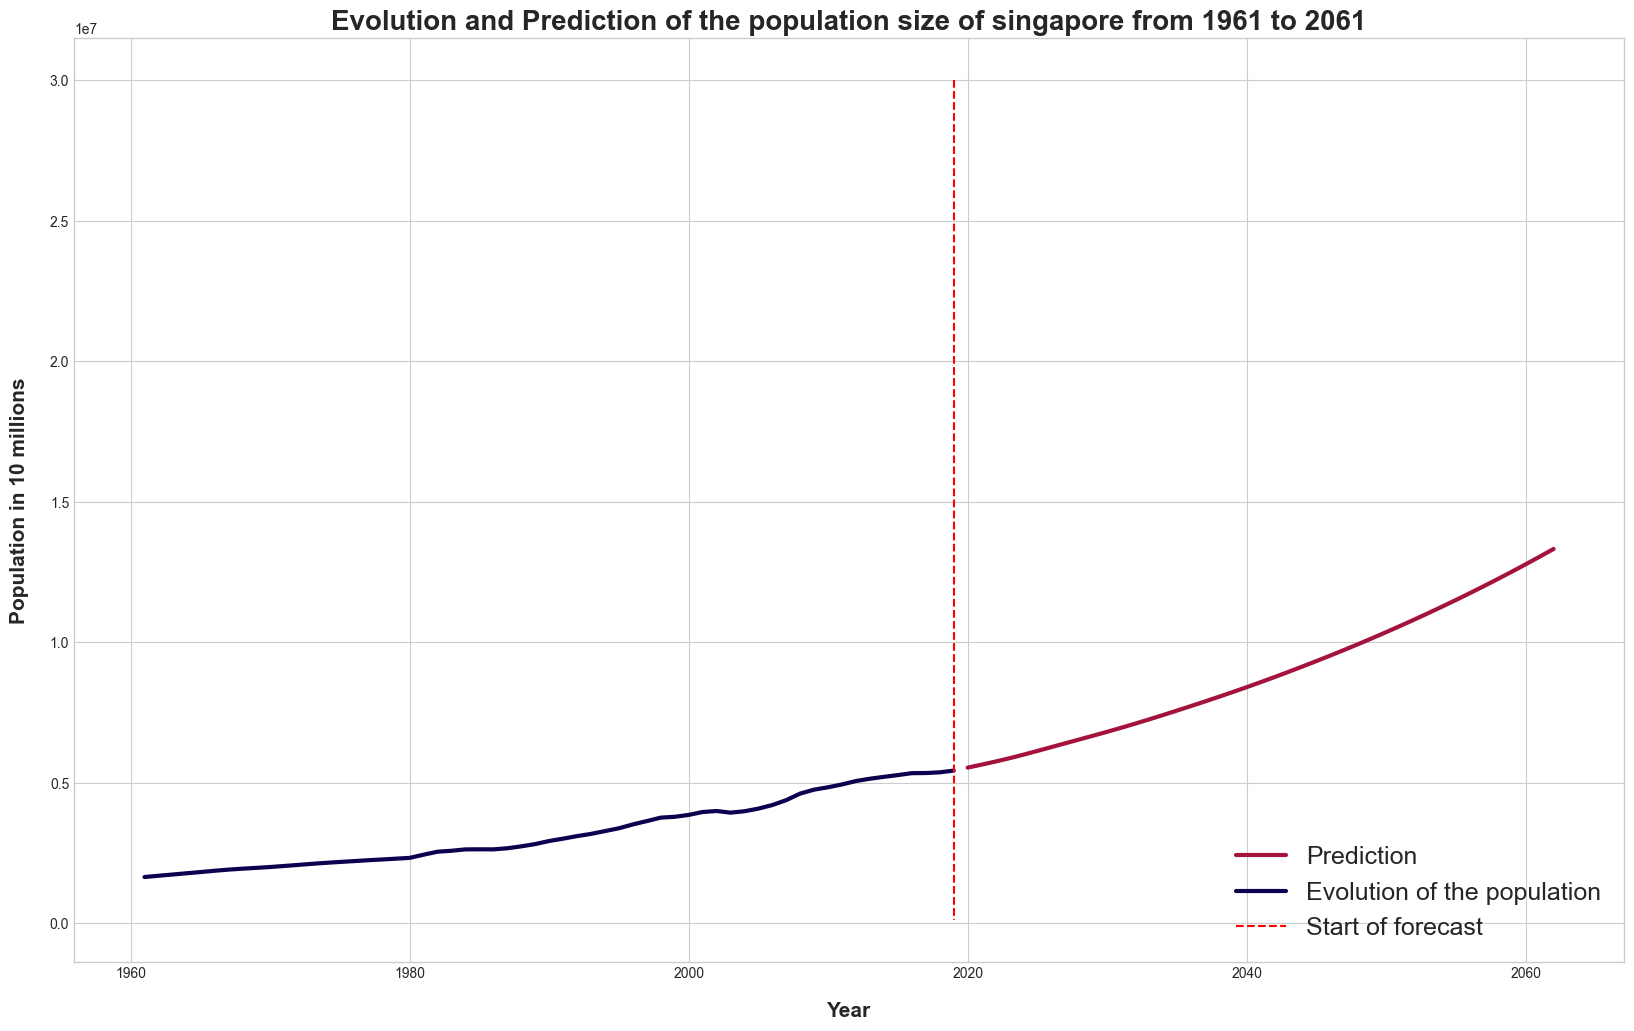

In [51]:
sPopIni = singapore["Population_2019"].values[0]
sPred_pop_size = []

for spercGrowth in spred:
    sPopIni = sPopIni + sPopIni * (spercGrowth/100)
    sPred_pop_size.append(sPopIni)
    
#Set a figure 
fig = plt.figure(figsize=[20,12])
plt.xlabel("Year",fontsize=15,fontweight=550,labelpad=15)
plt.ylabel("Population in 10 millions",fontsize=15,fontweight=550,labelpad=15)
plt.title("Evolution and Prediction of the population size of singapore from 1961 to 2061",fontsize=20,fontweight=600)
#ax_P.set_xticks([i*2 for i in range(0,30)])
#ax_P.set_xticklabels(labels  = [1961 + i*2 for i in range(0,30)])

plt.plot([2020 + i for i in range(43)],sPred_pop_size,linewidth=3,label="Prediction",color = "#a4133c")
plt.plot([int(item[-4:]) for item in singapore.columns[61:].tolist()],singapore[singapore.columns[61:]].values[0],linewidth=3,label="Evolution of the population",color = "#0A014F")

plt.vlines(2019, 30000000, 110000, linestyle='--', color='r', label='Start of forecast');
plt.legend(fontsize=18,loc=4)